In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [39]:
rna_models = "template_median69pA.model"
# reference = 'ACGTACGTACGT'
reference = "ACGTCGATGCTAGCTCGTCGTACGAGGCGAGATATATCTTCATCTATCTAGAGAGCGACTGCTCGTCGTCGATAGGCGGCTCGTTCGAGAAGAGCTCGCTGCTCGAGAGTAGTAATATATCTTCTCTTTTGGTTGATGATAGTCGCTTCGAGAGTCTGCACGTCGATGCTAGCTCGTCGTACGAGGCGAGATATATCTTCATCTATCTAGAGAGCGACTGCTCGTCGTCGATAGGCGGCTCGTTCGAGAAGAGCTCGCTGCTCGAGAGTAGTAATATATCTTCTCTTTTGGTTGATGATAGTCGCTTCGAGAGTCTGCACGTCGATGCTAGCTCGTCGTACGAGGCGAGATATATCTTCATCTATCTAGAGAGCGACTGCTCGTCGTCGATAGGCGGCTCGTTCGAGAAGAGCTCGCTGCTCGAGAGTAGTAATATATCTTCTCTTTTGGTTGATGATAGTCGCTTCGAGAGTCTGC"

In [40]:
df = pd.read_csv(rna_models, sep='\t')
dic = {key : (mean, std) for key, mean, std in zip(df['kmer'], df['level_mean'], df['level_stdv'])}

In [47]:
sim_signal = []
borders = [0]
last_border = 0

for n in range(len(reference) - 5):
    kmer = reference[n:n+5]
    # segment_length = np.random.binomial(100, 0.5, 1)
    segment_length = norm.ppf(np.random.random(1), loc=50, scale=5).astype(int)
    last_border += segment_length
    borders.append(last_border.item())

    sim_signal.extend(np.random.normal(dic[kmer][0], dic[kmer][1], segment_length))

sim_signal = np.array(sim_signal)

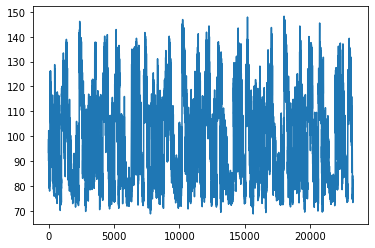

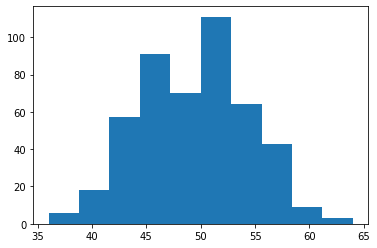

In [48]:
plt.plot(sim_signal)
# plt.vlines(borders, ymin = min(sim_signal), ymax=max(sim_signal), color = 'red', linestyle = '--', linewidth = 1)
plt.show()

plt.hist(np.diff(borders))
plt.show()